In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import seaborn as sns 

In [30]:
df = pd.read_csv('C:\\Users\\lenovo\\Desktop\\Airlines_Dataset\\Airline_Delay_Cause.csv',on_bad_lines = 'warn',engine = 'python')
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,0.0,5.99,2.0,1.0,1375.0,71.0,761.0,118.0,0.0,425.0
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,0.0,7.42,0.0,1.0,799.0,218.0,1.0,62.0,0.0,518.0
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,0.0,4.28,1.0,0.0,766.0,56.0,188.0,78.0,0.0,444.0
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,0.0,1.57,1.0,1.0,1397.0,471.0,320.0,388.0,0.0,218.0
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,0.0,11.28,2.0,0.0,1530.0,628.0,0.0,134.0,0.0,768.0


In [31]:
df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [32]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,171666.0,2018.551361,2.890006,2013.0,2016.00,2019.00,2021.00,2023.00
month,171666.0,6.493633,3.440908,1.0,4.00,7.00,9.00,12.00
arr_flights,171426.0,362.528467,992.894662,1.0,50.00,100.00,250.00,21977.00
arr_del15,171223.0,66.434387,179.540694,0.0,6.00,17.00,47.00,4176.00
carrier_ct,171426.0,20.796615,50.315176,0.0,2.16,6.40,17.26,1293.91
weather_ct,171426.0,2.250347,7.314252,0.0,0.00,0.40,1.86,266.42
nas_ct,171426.0,19.381147,61.675244,0.0,1.00,3.91,11.71,1884.42
security_ct,171426.0,0.157096,0.717405,0.0,0.00,0.00,0.00,58.69
late_aircraft_ct,171426.0,23.770554,72.393477,0.0,1.23,5.00,15.26,2069.07
arr_cancelled,171426.0,7.530497,43.654880,0.0,0.00,1.00,4.00,4951.00


In [34]:
### filling nan values with median 
numeric_cols = ['arr_flights','arr_del15','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct','arr_cancelled'
               ,'arr_diverted','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
for col in numeric_cols:
    df[col].fillna(df[col].median(),inplace = True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10208\3056835158.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace = True)


In [39]:
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [21]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
171661    False
171662    False
171663    False
171664    False
171665    False
Length: 171666, dtype: bool

In [22]:
df[df.duplicated(keep = False)]

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


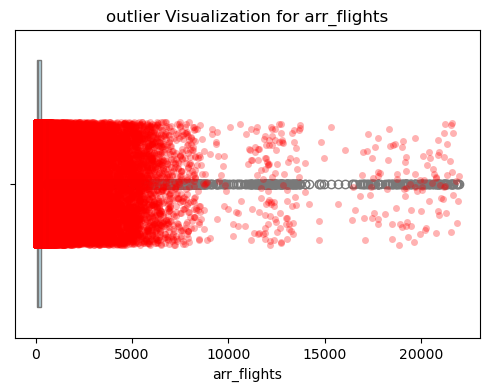

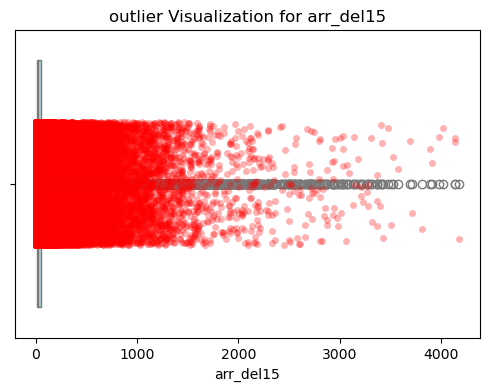

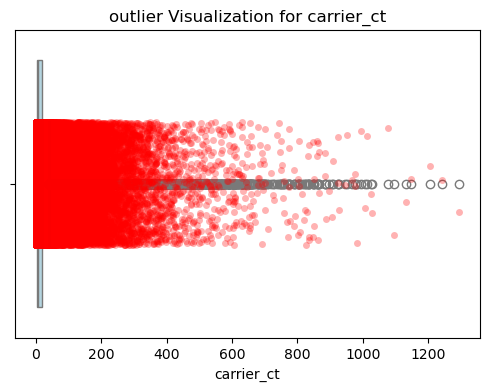

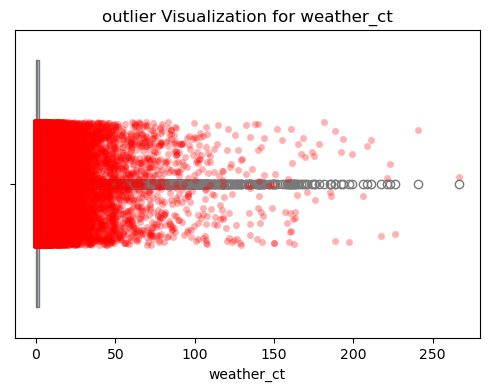

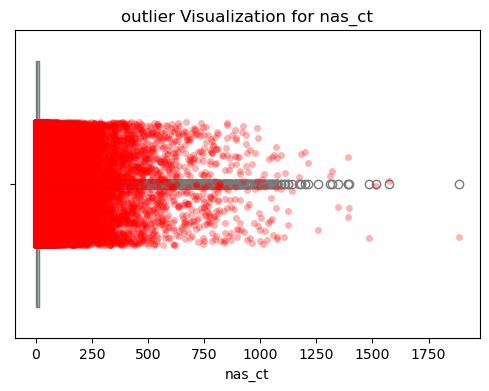

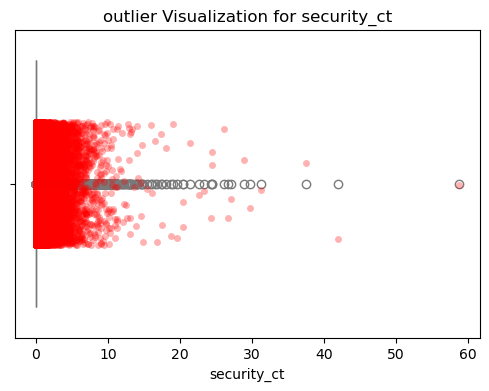

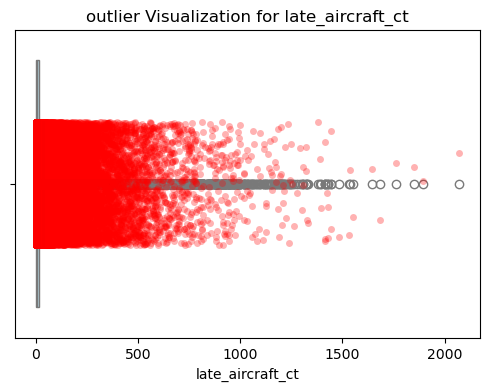

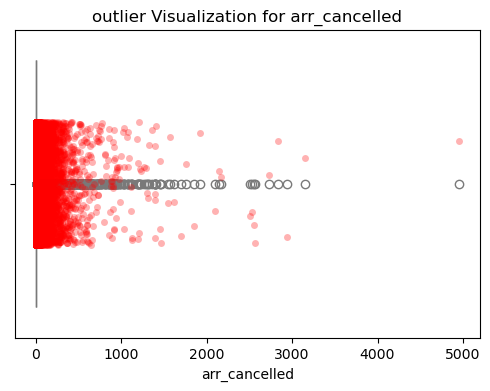

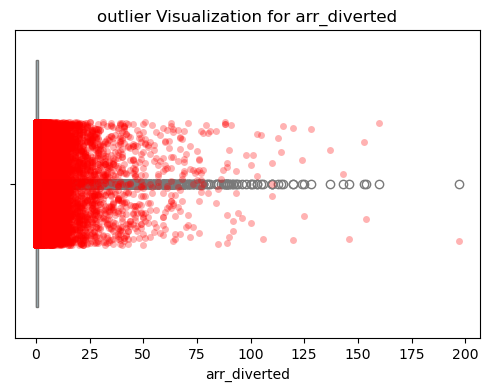

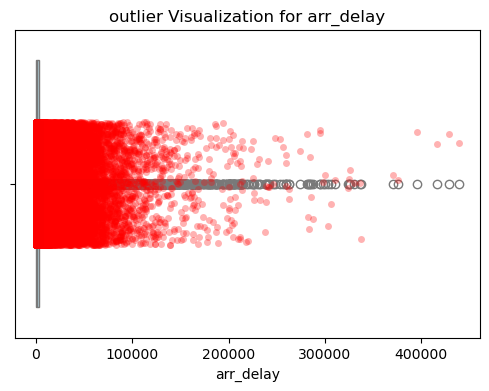

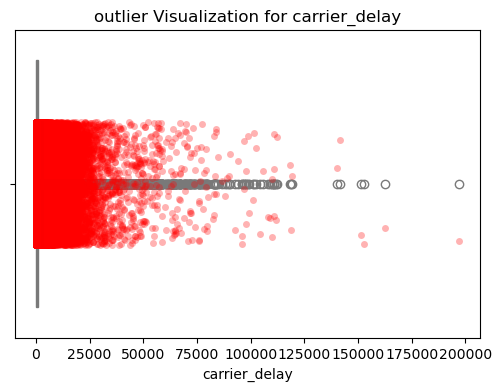

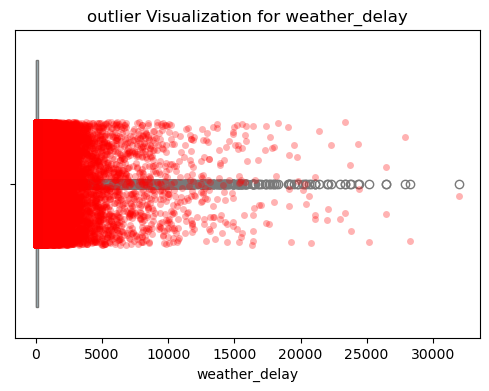

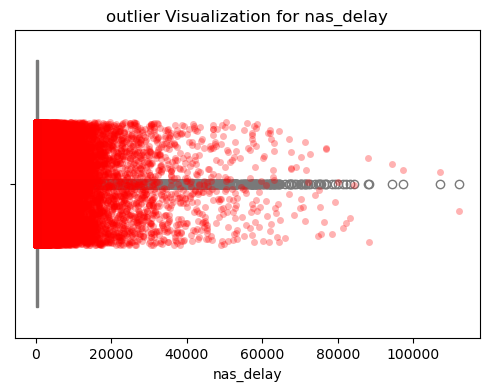

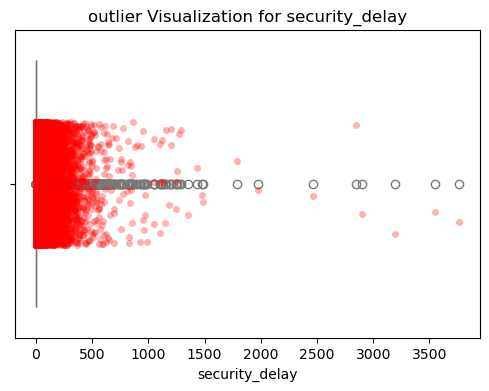

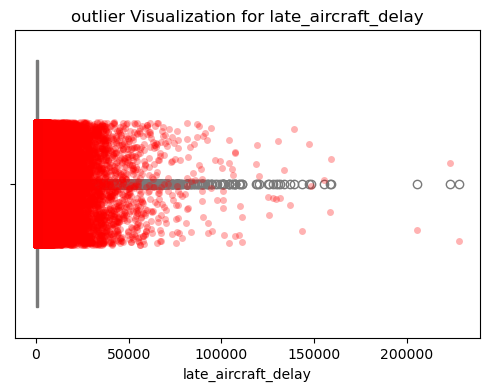

In [43]:
## check for the outliers 
for col in numeric_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x=df[col],color = 'lightblue')
    sns.stripplot(x=df[col],color = 'red',alpha = 0.3, jitter = 0.2)
    plt.title(f'outlier Visualization for {col}')
    plt.show()

In [44]:
## removing outliers through z-score 
import numpy as np
from scipy import stats

df_z = df.copy()
z_scores = pd.DataFrame(stats.zscore(df[numeric_cols],nan_policy = 'omit'),
                       columns = numeric_cols , index = df.index)

## Attach the zscore to the main dataframe 
for col in numeric_cols:
    df_z[f'{col}_zscore'] = z_scores[col]

In [47]:
df_z.head(-100)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct_zscore,late_aircraft_ct_zscore,arr_cancelled_zscore,arr_diverted_zscore,arr_delay_zscore,carrier_delay_zscore,weather_delay_zscore,nas_delay_zscore,security_delay_zscore,late_aircraft_delay_zscore
0,2023,8,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",89.0,13.0,2.25,1.60,...,-0.218819,-0.245408,-0.126565,0.036554,-0.226798,-0.323933,0.656542,-0.234293,-0.176578,-0.234713
1,2023,8,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",62.0,10.0,1.97,0.04,...,-0.218819,-0.225642,-0.172410,0.036554,-0.272475,-0.289041,-0.269671,-0.250661,-0.176578,-0.216892
2,2023,8,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,10.0,2.73,1.18,...,-0.218819,-0.269045,-0.149487,-0.228674,-0.275092,-0.327494,-0.041774,-0.245984,-0.176578,-0.231072
3,2023,8,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",66.0,12.0,3.69,2.27,...,-0.218819,-0.306503,-0.149487,0.036554,-0.225053,-0.228987,0.119095,-0.155374,-0.176578,-0.274380
4,2023,8,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",92.0,22.0,7.76,0.00,...,-0.218819,-0.172287,-0.126565,-0.228674,-0.214506,-0.191720,-0.270890,-0.229616,-0.176578,-0.168985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171561,2013,8,WN,Southwest Airlines Co.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",5403.0,1083.0,253.79,16.52,...,2.431389,8.045992,-0.011951,0.036554,3.327604,2.220867,1.083087,1.738683,0.805421,4.931573
171562,2013,8,WN,Southwest Airlines Co.,CAK,"Akron, OH: Akron-Canton Regional",88.0,33.0,9.93,0.22,...,-0.218819,-0.058529,-0.172410,-0.228674,-0.213634,-0.245128,-0.242860,-0.239554,-0.176578,-0.121653
171563,2013,8,WN,Southwest Airlines Co.,CHS,"Charleston, SC: Charleston AFB/International",217.0,71.0,26.27,0.76,...,-0.218819,0.068223,-0.172410,-0.228674,-0.076999,-0.097011,-0.202643,-0.105976,-0.176578,-0.004951
171564,2013,8,WN,Southwest Airlines Co.,CLE,"Cleveland, OH: Cleveland-Hopkins International",392.0,140.0,59.29,2.01,...,-0.218819,0.552562,-0.172410,-0.228674,0.159474,0.182131,0.164186,-0.120883,-0.176578,0.293222


In [49]:
## Detecting outliers 
threshold = 3
outlier_flags = (np.abs(z_scores)> threshold)
outliers_count = outlier_flags.sum().sort_values(ascending = False)

print('Outliers counts per column:')
print(outliers_count)

Outliers counts per column:
arr_flights            3874
arr_del15              3627
carrier_ct             3586
late_aircraft_ct       3399
arr_delay              3267
nas_ct                 3262
late_aircraft_delay    3221
carrier_delay          2908
nas_delay              2711
security_ct            2635
weather_ct             2484
weather_delay          2287
security_delay         2232
arr_diverted           1951
arr_cancelled          1368
dtype: int64


In [51]:
## filtering the data without outliers
df_no_outliers = df[(np.abs(z_scores) < threshold).all(axis = 1)]
df_no_outliers.shape

(162619, 21)